

# Project: Investigating The TMDb Movies Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions and saving</a></li>
</ul>

<a id='intro'></a>
## Introduction



   In this project we'll be analyzing the TMDb dataset using Python, NumPy, and Pandas. Moreover, we will be plotting the answer in this ipynp file using matplotlib and seaborn. Therefore, first we will be wrangling and cleaning the data, then we will do our best to answer questions associated to this dataset, such as, which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues? Are movies getting better around the years or not?

`Can't wait to show you around the project`

In [1]:
# This cell is used to set up import statements for all of the packages that we plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Wrangling & Cleaning the Data

> **Tip**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the TMDb movies dataset for analysis.

### General Properties
  In the first part of our data wrangling we will be looking at the shape, columns, and properties of our data. Thus, we can customize the dataset to fit our questions and analysis.

In [2]:
# Loading the data.
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

     In here, we will be wrangling and cleaning the data at the same time

In [7]:
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'keywords', 'overview', 'production_companies', 'tagline', 'director'], axis= 1, inplace= True)

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace= True)

In [15]:
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 931.7+ KB


In [16]:
df.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


  
      Finally, at the end we can plot our data to easily see the shape and properties of our data and weather it changed a           lot or not from the previous inspection.
   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e679ca710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6e6781ff28>]], dtype=object)

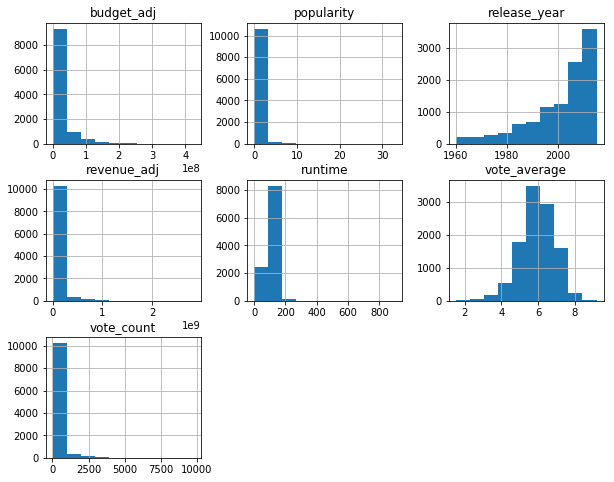

In [18]:
df.hist(figsize= (10,8))

# Conclusion of Wrangling and Cleaning

  At this point we noticed that the data does have a multiple of string columns that isn't needed in the analysis. Moreover, the data got a few numerical columns that contains a lot of missing values. Furthermore, the budget and the revenue columns are twice mentioned once with `“_adj”` and without, where The two columns ending with `“_adj”` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. And since we would like to compare between the movies regarding their years of release, then we deleted the budget and revenue columns.
  Last but not least, the genres column has a few missing rows. These few rows wouldn't affect our questions or analysis if they were deleted since they are just few rows. Therefore, we dropped them.
Finally, the histograms and the describe function show us that the data is right skewed at most numerical columns.

Therefore, we can say the database is generally clean.

<a id='eda'></a>
## Exploratory Data Analysis

 Now that we've trimmed and cleaned the data, we are ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we have you posed in the Introduction section. I'll try my best to be systematic with the approach. Therefore, looking at one variable at a time, and then follow it up by looking at relationships between variables is going to be the technique that we will be using.



### Which genres are most popular from year to year?

In [21]:
df[['genres1', 'genres2', 'genres3', 'genres4', 'genres5']] = df.genres.str.split("|",expand=True,)

   In Here, I tried to split genres so we can perform investigation codes on genres

In [22]:
df.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1,genres2,genres3,genres4,genres5
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


Looking at what we have done!!

In [23]:
print(' genres1 = ', df.genres1.nunique(), '\n',
      'genres2 = ', df.genres2.nunique(), '\n',
     'genres3 = ', df.genres3.nunique(), '\n',
     'genres4 = ', df.genres4.nunique(), '\n',
     'genres5 = ', df.genres5.nunique(), '\n',)

 genres1 =  20 
 genres2 =  20 
 genres3 =  20 
 genres4 =  20 
 genres5 =  19 



I investigated the numbers of genres we do have. Thus, I can make a list that involves each genre, which will be used in next commands

In [24]:
df.genres1.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

Since all the genres columns have the same number of different genres inside it. We can use any, except genres5 

In [22]:
list_genres = ['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign']

Making a list of genres

In [23]:
list_years = df.release_year.sort_values().unique()

Making a list of years

In [27]:
df.groupby(['release_year','genres1']).popularity.mean()

release_year  genres1        
1960          Action             0.590724
              Adventure          0.304992
              Comedy             0.392067
              Crime              0.269428
              Drama              0.687575
              Horror             0.254964
              Thriller           0.456165
1961          Action             0.540904
              Adventure          1.394596
              Comedy             0.431700
              Drama              0.361247
              Fantasy            0.154073
              Horror             0.254578
              Music              0.900245
              Romance            0.027527
              Science Fiction    0.083697
              Western            0.210021
1962          Action             0.299207
              Adventure          1.283631
              Comedy             0.181376
              Crime              0.472816
              Drama              0.341549
              Fantasy            0.235542
    

Figuring out the most popular genres around the years numerically.

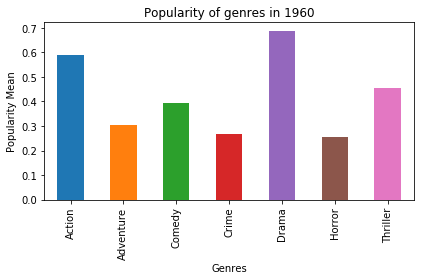

In [28]:
plt_1960 = df.query('release_year == 1960').groupby('genres1').popularity.mean().plot(kind= 'bar'),plt.title('Popularity of genres in 1960'),plt.xlabel('Genres'),plt.ylabel('Popularity Mean'),plt.tight_layout()

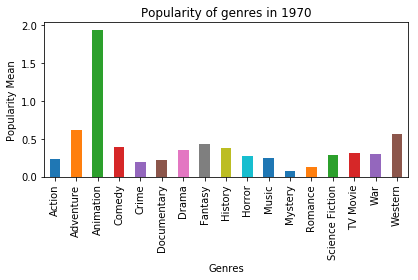

In [29]:
plt_1970 = df.query('release_year == 1970').groupby('genres1').popularity.mean().plot(kind= 'bar'),plt.title('Popularity of genres in 1970'),plt.xlabel('Genres'),plt.ylabel('Popularity Mean'),plt.tight_layout()

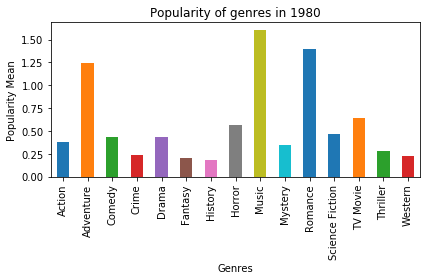

In [30]:
plt_1980 = df.query('release_year == 1980').groupby('genres1').popularity.mean().plot(kind= 'bar'),plt.title('Popularity of genres in 1980'),plt.xlabel('Genres'),plt.ylabel('Popularity Mean'),plt.tight_layout()

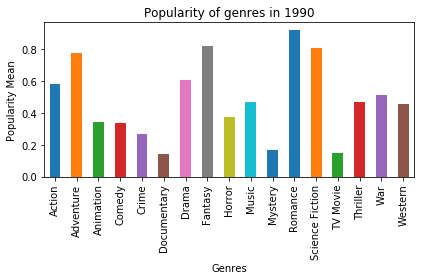

In [31]:
plt_1990 = df.query('release_year == 1990').groupby('genres1').popularity.mean().plot(kind= 'bar'),plt.title('Popularity of genres in 1990'),plt.xlabel('Genres'),plt.ylabel('Popularity Mean'),plt.tight_layout()

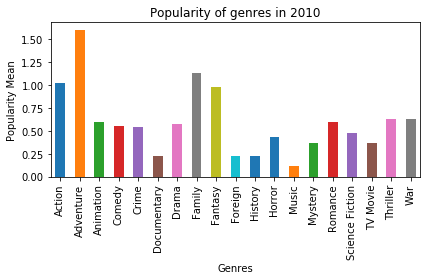

In [32]:
plt_2010 = df.query('release_year == 2010').groupby('genres1').popularity.mean().plot(kind= 'bar'),plt.title('Popularity of genres in 2010'),plt.xlabel('Genres'),plt.ylabel('Popularity Mean'),plt.tight_layout()

In the five previous cells, we plotted random years genres with 10 to 20 years different each time. After which, we can make a few simple conclusions about it. First, that the numbers of genres are increasing through the years. Moreover, we can't decide a favor genre around the years since there are a hesitation in the popularity of genres through years as the bar charts shows. However, in most years there were a famous genre that was the popular.

In [31]:

for i in range(56):
    k = list_years[i]
    print(df.query('release_year == k').groupby('genres1').popularity.mean().plot(kind= 'bar'), plt.title(i))

UndefinedVariableError: name 'k' is not defined

In [32]:
i = 1960
while i < 2016:
    print(df['release_year' == 1960].groupby('genres1').popularity.mean().plot(kind= 'bar'), plt.title(i))
    i += 1

KeyError: False

In these two cells I tried my best to plotting for each year individually. Nevertheless, none of the two loops worked and I couldn't find an answer for them. Please help me if they were necessary to my project.

### Are movies getting better around the years or not?

In [33]:
df.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1,genres2,genres3,genres4,genres5
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


Looking at the data!!

In [35]:
df.groupby('release_year').vote_average.mean()

release_year
1960    6.325000
1961    6.374194
1962    6.343750
1963    6.329412
1964    6.211905
1965    6.194286
1966    6.128261
1967    6.242500
1968    6.379487
1969    5.961290
1970    6.502500
1971    6.420000
1972    6.535000
1973    6.703636
1974    6.426087
1975    6.390909
1976    6.340426
1977    6.147368
1978    6.130769
1979    6.308772
1980    6.160256
1981    6.165854
1982    6.241975
1983    5.971250
1984    6.003810
1985    6.177064
1986    6.004959
1987    6.128800
1988    5.965517
1989    6.075735
1990    5.993939
1991    6.014286
1992    6.081203
1993    6.050000
1994    5.942391
1995    6.052299
1996    5.897044
1997    5.988542
1998    5.970476
1999    6.032589
2000    5.884513
2001    5.890871
2002    5.973308
2003    5.930961
2004    5.988599
2005    5.866391
2006    5.941422
2007    5.964384
2008    5.930505
2009    5.851601
2010    5.989733
2011    5.958519
2012    5.789384
2013    5.875000
2014    5.919456
2015    5.886762
Name: vote_average, dtype: float64

In [36]:
df.groupby('release_year').popularity.mean()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
1965    0.342587
1966    0.304112
1967    0.471154
1968    0.484202
1969    0.422778
1970    0.341638
1971    0.448112
1972    0.449054
1973    0.494462
1974    0.453760
1975    0.519445
1976    0.474516
1977    0.626387
1978    0.413314
1979    0.589312
1980    0.495652
1981    0.442413
1982    0.543353
1983    0.541445
1984    0.590843
1985    0.584058
1986    0.509545
1987    0.504637
1988    0.465039
1989    0.567107
1990    0.535735
1991    0.501090
1992    0.582913
1993    0.547056
1994    0.668825
1995    0.714641
1996    0.606398
1997    0.712003
1998    0.626165
1999    0.645799
2000    0.549050
2001    0.705034
2002    0.701454
2003    0.719083
2004    0.722438
2005    0.630140
2006    0.606371
2007    0.593161
2008    0.585705
2009    0.601831
2010    0.647398
2011    0.675069
2012    0.609632
2013    0.629956
2014    0.888065
2015    1.033347
Name: popularity, dtype: float64

Figuring out the popularity and voting for the data numerically.

Text(0,0.5,'Vote Average')

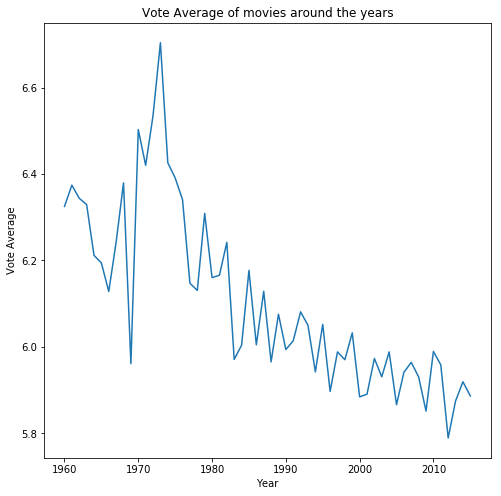

In [36]:
df.groupby('release_year').vote_average.mean().plot(kind='line', figsize= (8,8))
plt.title('Vote Average of movies around the years')
plt.xlabel('Year')
plt.ylabel('Vote Average')

Text(0,0.5,'Popularity Mean')

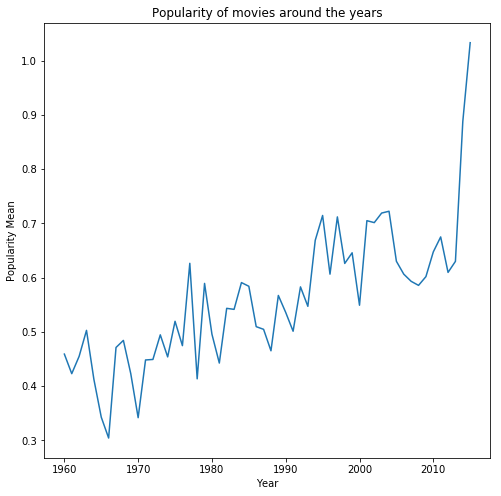

In [37]:
df.groupby('release_year').popularity.mean().plot(kind='line', figsize= (8,8))
plt.title('Popularity of movies around the years')
plt.xlabel('Year')
plt.ylabel('Popularity Mean')

Figuring out the popularity and voting for the data by plotting.

We can see that people rating votes for movies have decreased through the years. One the other hand, the popularity has raised, which indicates that people think movies' quality are becoming worse. However, the number of people watching movies have increased, which interpret the popularity boost.

### What kinds of properties are associated with movies that have high revenues?

In [39]:
df.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1,genres2,genres3,genres4,genres5
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


Looking at the data!!

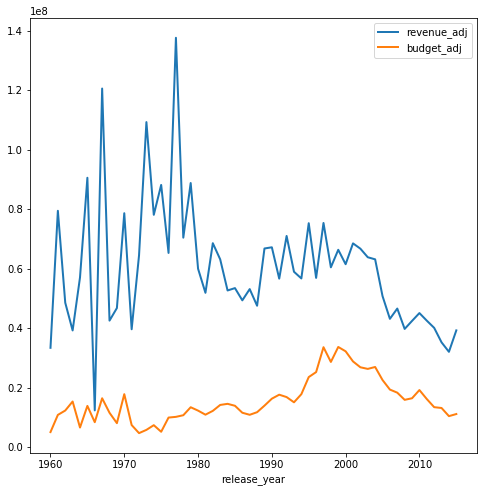

In [40]:
df.groupby('release_year').revenue_adj.mean().plot(kind='line', figsize= (8,8), linewidth=2, markersize=12)
df.groupby('release_year').budget_adj.mean().plot(kind='line', figsize= (8,8), linewidth=2, markersize=12)
plt.legend()

In [41]:
df['revenue_adj'].corr(df['budget_adj'])

0.6465071428027237

First, I have plotted the two variables to see if there were any correlation between the two columns `Budget and Revenue` and after looking at the diagram. we can figure out that there are. However, to make it certain the second cell certain, statically, that there is a moderately strong positive linear relationship.

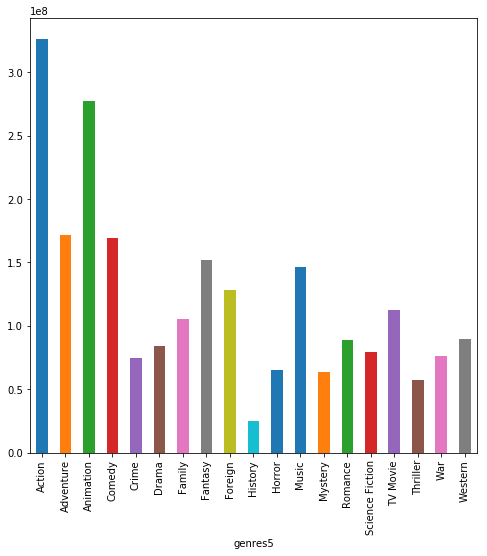

In [43]:
df.groupby('genres1').revenue_adj.mean().plot(kind='bar', figsize= (8,8))
df.groupby('genres2').revenue_adj.mean().plot(kind='bar', figsize= (8,8))
df.groupby('genres3').revenue_adj.mean().plot(kind='bar', figsize= (8,8))
df.groupby('genres4').revenue_adj.mean().plot(kind='bar', figsize= (8,8))
df.groupby('genres5').revenue_adj.mean().plot(kind='bar', figsize= (8,8))

In [ ]:
y_pos1 = [1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58]
y_pos2 = np.arange(df.genres2.nunique())
y_pos3 = np.arange(df.genres3.nunique())
y_pos4 = np.arange(df.genres4.nunique())
y_pos5 = np.arange(df.genres5.nunique())

In [133]:
y_pos1 = [1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58]
y_pos1 = np.array(y_pos1)
y_pos2 = [1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58]
y_pos2 = np.array(y_pos2)
y_pos3 = [1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58]
y_pos3 = np.array(y_pos3)
y_pos4 = [1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58]
y_pos4 = np.array(y_pos4)
y_pos5 = [1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55]
y_pos5 = np.array(y_pos5)

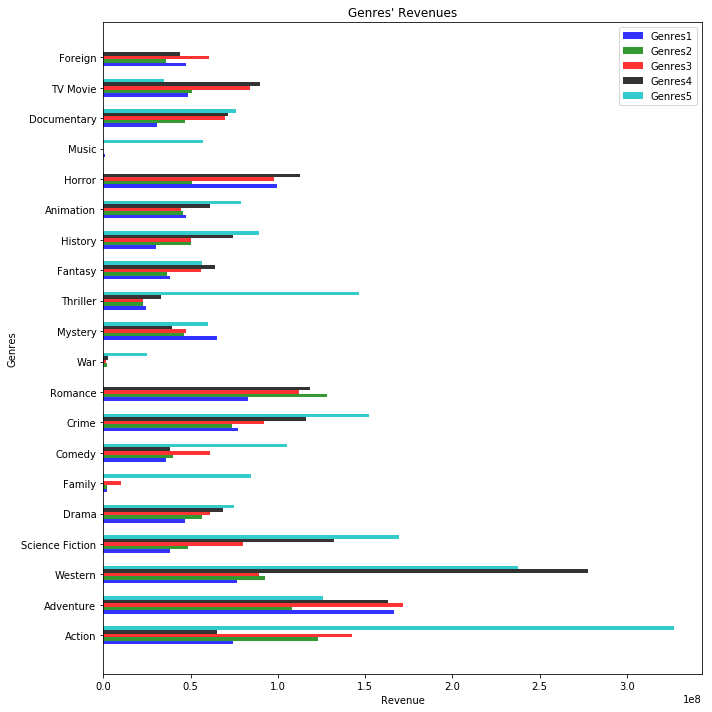

In [141]:
performance1 = df.groupby('genres1').revenue_adj.mean()
performance2 = df.groupby('genres2').revenue_adj.mean()
performance3 = df.groupby('genres3').revenue_adj.mean()
performance4 = df.groupby('genres4').revenue_adj.mean()
performance5 = df.groupby('genres5').revenue_adj.mean()

plt.figure(figsize=(10,10))
bar_width = 0.35
opacity = 0.8

rects1 = plt.barh(y_pos1, performance1, bar_width,
alpha=opacity,
color='b',
label='Genres1')

rects2 = plt.barh(y_pos2 + bar_width, performance2, bar_width,
alpha=opacity,
color='g',
label='Genres2')

rects3 = plt.barh(y_pos3 + (bar_width*2), performance3, bar_width,
alpha=opacity,
color='r',
label='Genres3')

rects4 = plt.barh(y_pos4 + (bar_width*3), performance4, bar_width,
alpha=opacity,
color='k',
label='Genres4')

rects5 = plt.barh(y_pos5 + (bar_width*4), performance5, bar_width,
alpha=opacity,
color='c',
label='Genres5')


plt.yticks(y_pos1 + bar_width*2, df.genres1.unique())
plt.ylabel('Genres')
plt.xlabel('Revenue')
plt.title("Genres' Revenues")
plt.legend()
plt.tight_layout()
plt.show()

At the last three cells, needed code were written to plot the association between genres and revenues from the data. We can conclude that does associate with high revenue. Generally, genres like adventure and western usually returns a high revenue. In the meanwhile, genres like Family and Music return a low revenue.

<a id='conclusions'></a>
## Conclusions

In Conclusion, the data is generally clean, wrangling was easy due to the data cleanness.
The exploration questions included: 
 
 
 `which genres are most popular from year to year? `
 `What kinds of properties are associated with movies that have high revenues? ` 
 `Are movies getting better around the years or not? `
 
 
 
Were we discovered that each year had its popular genre, also, we figured out the most popular genre for each year Furthermore, we discovered that high budget movies mostly returns high revenue, moreover, some genres usually returns high revenue than others. Finally, people rating for movies have declined through the years. However, more people becoming to watch movies as the years runs.

> This is the final sum up for the project hope you enjoyed it.


In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0